In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('investigations.csv')

In [4]:
df.head()

,buildId,clientDate,committers,changeCount,comment,triggeredBy,description,isDefaultBranch,branchName,committersUsers,...,testNameId,stacktrace,className,testMethod,testClass,testSuite,duration,orderId,isFixed,previousResponsible
0,84040967,"Aug 19, 2020, 5:26:22 PM","[{'name': 'Emma Starukhina', 'extendedName': '...",698,NaN,Finish Build Trigger; IntelliJ Platform Produc...,NaN,True,<default>,"[{'filesChange': 1, 'changesNames': ['server-m...",...,1791259342594199780,java.lang.AssertionError: Multiple text checki...,jetbrains.buildServer.serverSide.TestImpl,test_system_properties_must_be_passed_to_artif...,ExternalMakeCommandLineBuildServiceTest,[TeamCity] External Make Tests:,8265,143,False,['Pavel Sher (pavel.sher)']
1,31498348,"Jun 28, 2018, 3:19:47 AM",[],0,NaN,Schedule Trigger,NaN,False,NaN,[],...,1791259342594199780,NaN,jetbrains.buildServer.serverSide.TestImpl,test_system_properties_must_be_passed_to_artif...,ExternalMakeCommandLineBuildServiceTest,[TeamCity] External Make Tests:,12975,5735,False,['Pavel Sher (pavel.sher)']
2,47267549,"May 23, 2019, 5:34:07 AM","[{'name': 'Julia Alexandrova', 'extendedName':...",20,NaN,Snapshot dependency; Schedule Trigger; TeamCit...,NaN,True,<default>,"[{'filesChange': 1, 'changesNames': ['nuget-se...",...,-8929370305362479013,NaN,jetbrains.buildServer.serverSide.TestImpl,test_batch_reportNUnitAndYouTrackSharp_from_de...,ListPackagesCommandIntegrationTest,nuget: nuget integration test:,2049,1683,False,['Ilya Fomenko (ilya.fomenko)']
3,47267549,"May 23, 2019, 5:34:07 AM","[{'name': 'Julia Alexandrova', 'extendedName':...",20,NaN,Snapshot dependency; Schedule Trigger; TeamCit...,NaN,True,<default>,"[{'filesChange': 1, 'changesNames': ['nuget-se...",...,6659040006025667743,NaN,jetbrains.buildServer.serverSide.TestImpl,test_batch_reportNUnitAndYouTrackSharp_from_de...,ListPackagesCommandIntegrationTest,nuget: nuget integration test:,2635,1687,False,['Ilya Fomenko (ilya.fomenko)']
4,47267569,"May 23, 2019, 5:02:51 AM","[{'name': 'Julia Alexandrova', 'extendedName':...",5112,NaN,Snapshot dependency; Schedule Trigger; TeamCit...,NaN,True,<default>,"[{'filesChange': 6, 'changesNames': ['web/WEB-...",...,-3639371091024077385,NaN,jetbrains.buildServer.serverSide.TestImpl,test_connectWithLoginPassword,TfsJavaTestConnectionSupportTest,TFS Java SDK Test Suite:,266,175,False,"['Ilya Fomenko (ilya.fomenko)', 'Dmitry Tresku..."


In [5]:
useless = ['isFixed', 'description', 'comment', 'branchName', 'className']
df = df.drop(useless, axis=1)

In [7]:
df['target'] = df['previousResponsible'].apply(lambda str_list: json.loads(str_list.replace('\'', '"'))[0])

In [8]:
df['target'].value_counts()

Ilya Fomenko (ilya.fomenko)                556
Pavel Sher (pavel.sher)                     92
Filipp Riabchun (filipp.riabchun)           26
Julia Reshetnikova (julia.reshetnikova)     24
Andrey Titov (andrey.titov)                 18
Sergey Pak (sergey.pak)                     10
Evgeny Doroshenko (evgeny.doroshenko)        8
Yegor Yarko (yaegor)                         8
Aleksey Dobrynin (aleksey.dobrynin)          2
Name: target, dtype: int64

In [9]:
df['previousResponsible'] = df['previousResponsible'].apply(lambda str_list: json.loads(str_list.replace('\'', '"'))[1:])

In [10]:
set(df['testSuite'])

{'Agent tests: ',
 'DB Suite: ',
 'IDEA runner suite: ',
 'Ldap Suite: ',
 'Overview/Agents: ',
 'Overview/Overview: ',
 'Server tests: ',
 'Smoke Tests: Auto-Update Test Scenario: ',
 'Smoke Tests: Build Verification Tests: ',
 'System Tests: Smoke Tests: ',
 'TFS Java SDK Test Suite: ',
 'Visual Studio Test: ',
 '[TeamCity] External Make Tests: ',
 'nuget: nuget integration test: ',
 'storyshots.test.js: Storyshots: /Error alerts: '}

In [11]:
df['testNameId'].value_counts()

 1791259342594199780    38
 6677838524259399197    38
-3639371091024077385    36
 6159860086802219024    36
 7850935268128904239    36
 5815873171975405504    36
 5388556271807252230    36
-3259026975647507807    36
 3339766714334733208    36
-621559526513354339     36
-1665204198366830965    36
 183045401477554608     36
 2103613887120467622    36
-5540656993770176231    30
 7073029182229342984    24
-7975875114491193572    20
 2093301233110334890    14
 7689804100030756799    12
-6952445292775164088    10
 7947374575254019522    10
-1828660432187194524    10
 5660251422648497649     8
 4603130212651668068     8
-3445566310823311944     8
 9038676351990403638     8
-5770084195286479548     6
-7167385372871972884     6
-8929370305362479013     6
 380483693315014820      6
-7765370657989250226     6
 4779966926913959842     6
-4232748521727641301     6
 6659040006025667743     6
 6957190986177005317     6
 6237177568023266891     6
 5622152379609200208     6
-5239639202233253763     6
 

In [12]:
df['committers'] = df['committers'].apply(lambda row: json.loads(row.replace("'", '"').replace('False', '"False"').replace('True', '"True"')))

In [13]:
df['committers_count'] = df['committers'].apply(lambda row: len(row))

In [22]:
len(df[df['committers_count'] == 0]) # flaky

117

In [85]:
df['committers_count'].value_counts()

22    142
0     117
24     82
21     80
20     74
27     70
1      57
26     26
29     16
23     14
2      14
25     12
3      10
4       8
9       6
36      4
18      4
13      4
39      4
Name: committers_count, dtype: int64

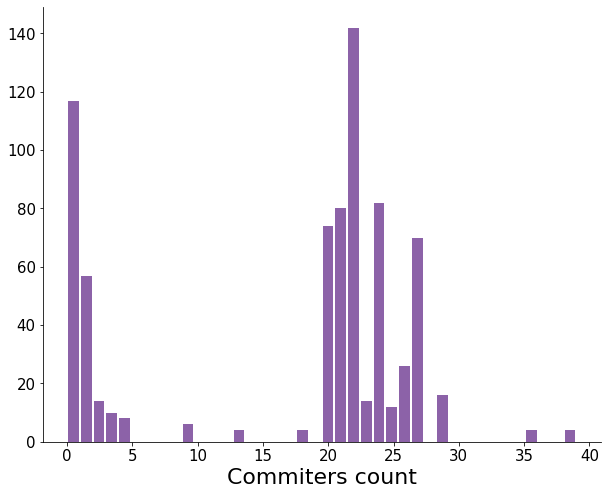

In [25]:
plt.figure(figsize=[10,8])
n, bins, patches = plt.hist(x=df['committers_count'], bins=40, color='#5b2084',alpha=0.7, rwidth=0.85)
plt.xlabel('Commiters count',fontsize=22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')

plt.tick_params(right=False, top=False) 

plt.show()

In [26]:
df.head()

,buildId,clientDate,committers,changeCount,triggeredBy,isDefaultBranch,committersUsers,reasons,testCount,testRunId,testNameId,stacktrace,testMethod,testClass,testSuite,duration,orderId,previousResponsible,target,committers_count
0,84040967,"Aug 19, 2020, 5:26:22 PM","[{'name': 'Emma Starukhina', 'extendedName': '...",698,Finish Build Trigger; IntelliJ Platform Produc...,True,"[{'filesChange': 1, 'changesNames': ['server-m...",[],143,7338,1791259342594199780,java.lang.AssertionError: Multiple text checki...,test_system_properties_must_be_passed_to_artif...,ExternalMakeCommandLineBuildServiceTest,[TeamCity] External Make Tests:,8265,143,[],Pavel Sher (pavel.sher),27
1,31498348,"Jun 28, 2018, 3:19:47 AM",[],0,Schedule Trigger,False,[],[],20302,36198,1791259342594199780,NaN,test_system_properties_must_be_passed_to_artif...,ExternalMakeCommandLineBuildServiceTest,[TeamCity] External Make Tests:,12975,5735,[],Pavel Sher (pavel.sher),0
2,47267549,"May 23, 2019, 5:34:07 AM","[{'name': 'Julia Alexandrova', 'extendedName':...",20,Snapshot dependency; Schedule Trigger; TeamCit...,True,"[{'filesChange': 1, 'changesNames': ['nuget-se...",[{'addData': 'teamcity.process.flow.id=2111817...,1983,9808,-8929370305362479013,NaN,test_batch_reportNUnitAndYouTrackSharp_from_de...,ListPackagesCommandIntegrationTest,nuget: nuget integration test:,2049,1683,[],Ilya Fomenko (ilya.fomenko),26
3,47267549,"May 23, 2019, 5:34:07 AM","[{'name': 'Julia Alexandrova', 'extendedName':...",20,Snapshot dependency; Schedule Trigger; TeamCit...,True,"[{'filesChange': 1, 'changesNames': ['nuget-se...",[{'addData': 'teamcity.process.flow.id=2111817...,1983,9848,6659040006025667743,NaN,test_batch_reportNUnitAndYouTrackSharp_from_de...,ListPackagesCommandIntegrationTest,nuget: nuget integration test:,2635,1687,[],Ilya Fomenko (ilya.fomenko),26
4,47267569,"May 23, 2019, 5:02:51 AM","[{'name': 'Julia Alexandrova', 'extendedName':...",5112,Snapshot dependency; Schedule Trigger; TeamCit...,True,"[{'filesChange': 6, 'changesNames': ['web/WEB-...","[{'description': '13 failed tests detected', '...",392,13336,-3639371091024077385,NaN,test_connectWithLoginPassword,TfsJavaTestConnectionSupportTest,TFS Java SDK Test Suite:,266,175,[Dmitry Treskunov (dmitry.treskunov)],Ilya Fomenko (ilya.fomenko),27
